# Project Pertama: Predictive Analytics


## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# Load dataset daftar harga rumah
file_path = '/content/DATA RUMAH.xlsx'
rumah = pd.read_excel(file_path)
rumah

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


## Exploratory Data Analysis

### Deskripsi Variabel

**Insight Statistik Deskriptif**

Statistik deskriptif membantu kita memahami distribusi awal dari fitur numerik seperti harga, luas tanah, dan bangunan. Nilai mean, min, dan max bisa menunjukkan kemungkinan adanya outlier atau ketimpangan distribusi.

In [3]:
# Menampilkan 5 data pertama
print("5 data pertama:")
print(rumah.head)

5 data pertama:
<bound method NDFrame.head of         NO                                         NAMA RUMAH        HARGA  \
0        1  Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...   3800000000   
1        2  Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...   4600000000   
2        3  Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...   3000000000   
3        4           Rumah Baru Tebet, Tebet, Jakarta Selatan    430000000   
4        5  Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...   9000000000   
...    ...                                                ...          ...   
1005  1006  Rumah Strategis Akses Jalan 2mobil Di Menteng ...   9000000000   
1006  1007             Tebet Rumah Siap Huni Jln 2 Mbl Nyaman   4000000000   
1007  1008        Di Kebun Baru Rumah Terawat, Area Strategis   4000000000   
1008  1009  Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...  19000000000   
1009  1010                Dijual Rumah Kokoh Di Gudang Peluru  10500000000   

       LB   LT  K

In [4]:
# Menampilkan statistik deskriptif
print("\nStatistik deskriptif:")
print(rumah.describe())


Statistik deskriptif:
                NO         HARGA           LB           LT           KT  \
count  1010.000000  1.010000e+03  1010.000000  1010.000000  1010.000000   
mean    505.500000  7.628987e+09   276.539604   237.432673     4.668317   
std     291.706188  7.340946e+09   177.864557   179.957604     1.572776   
min       1.000000  4.300000e+08    40.000000    25.000000     2.000000   
25%     253.250000  3.262500e+09   150.000000   130.000000     4.000000   
50%     505.500000  5.000000e+09   216.500000   165.000000     4.000000   
75%     757.750000  9.000000e+09   350.000000   290.000000     5.000000   
max    1010.000000  6.500000e+10  1126.000000  1400.000000    10.000000   

                KM          GRS  
count  1010.000000  1010.000000  
mean      3.607921     1.920792  
std       1.420066     1.510998  
min       1.000000     0.000000  
25%       3.000000     1.000000  
50%       3.000000     2.000000  
75%       4.000000     2.000000  
max      10.000000    10.0000

In [5]:
# Menampilkan informasi dataset
print("\nInformasi dataset:")
print(rumah.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB
None


In [6]:
# Memeriksa jumlah baris dan kolom
print(f"Jumlah baris: {rumah.shape[0]}")
print(f"Jumlah kolom: {rumah.shape[1]}")

Jumlah baris: 1010
Jumlah kolom: 8


### Menangani Missing Value

**Pemeriksaan Missing Value**

Penting untuk mengetahui apakah ada nilai kosong (missing) dalam dataset karena dapat mempengaruhi performa model. Pada kasus ini, tidak ditemukan nilai kosong sehingga tidak perlu proses imputasi.

In [7]:
# Memeriksa missing value
print("Jumlah missing value per kolom:")
print(rumah.isnull().sum())

Jumlah missing value per kolom:
NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64


### Menangani Outliers

**Visualisasi Outlier dengan Boxplot**

Boxplot digunakan untuk mendeteksi outlier pada fitur numerik. Nilai yang berada jauh di luar box (di luar whisker) dianggap sebagai outlier dan bisa dipertimbangkan untuk dibuang agar model tidak bias.

<Axes: xlabel='LT'>

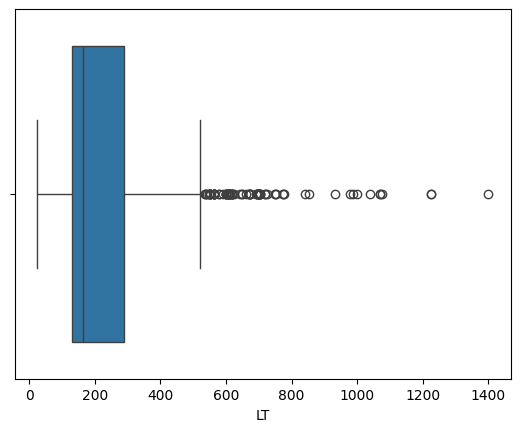

In [8]:
sns.boxplot(x=rumah['LT'])

<Axes: xlabel='LB'>

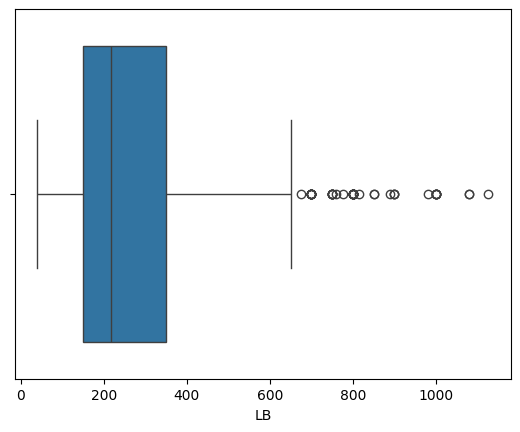

In [9]:
sns.boxplot(x=rumah['LB'])

<Axes: xlabel='KT'>

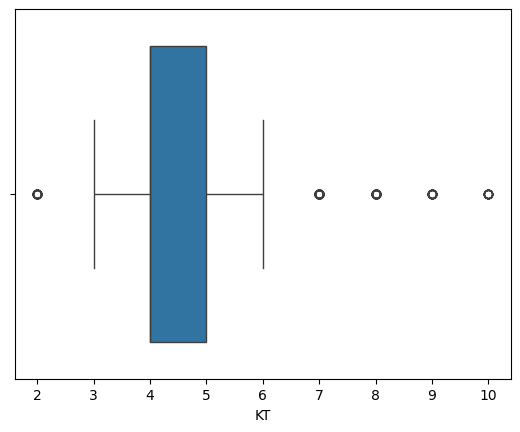

In [10]:
sns.boxplot(x=rumah['KT'])

<Axes: xlabel='KM'>

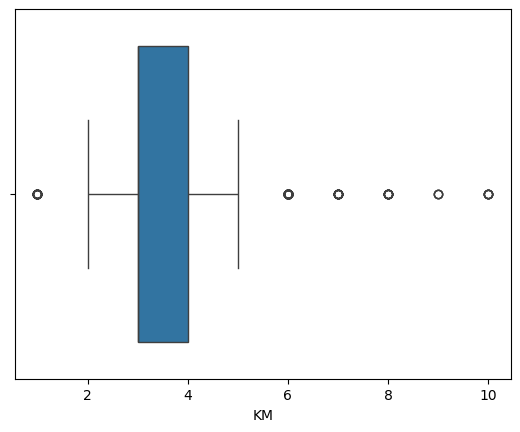

In [11]:
sns.boxplot(x=rumah['KM'])

<Axes: xlabel='GRS'>

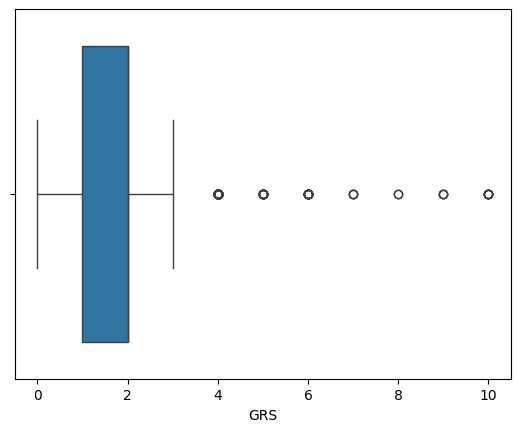

In [12]:
sns.boxplot(x=rumah['GRS'])

In [13]:
# Ambil hanya kolom numerikal
numeric_cols = rumah.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = rumah[numeric_cols].quantile(0.25)
Q3 = rumah[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((rumah[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (rumah[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
rumah = rumah[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
rumah.shape

(695, 8)

### Univariate Analysis

In [14]:
numerical_features = ['HARGA', 'LT', 'LB', 'KT', 'KM', 'GRS']

#### Numerical Features

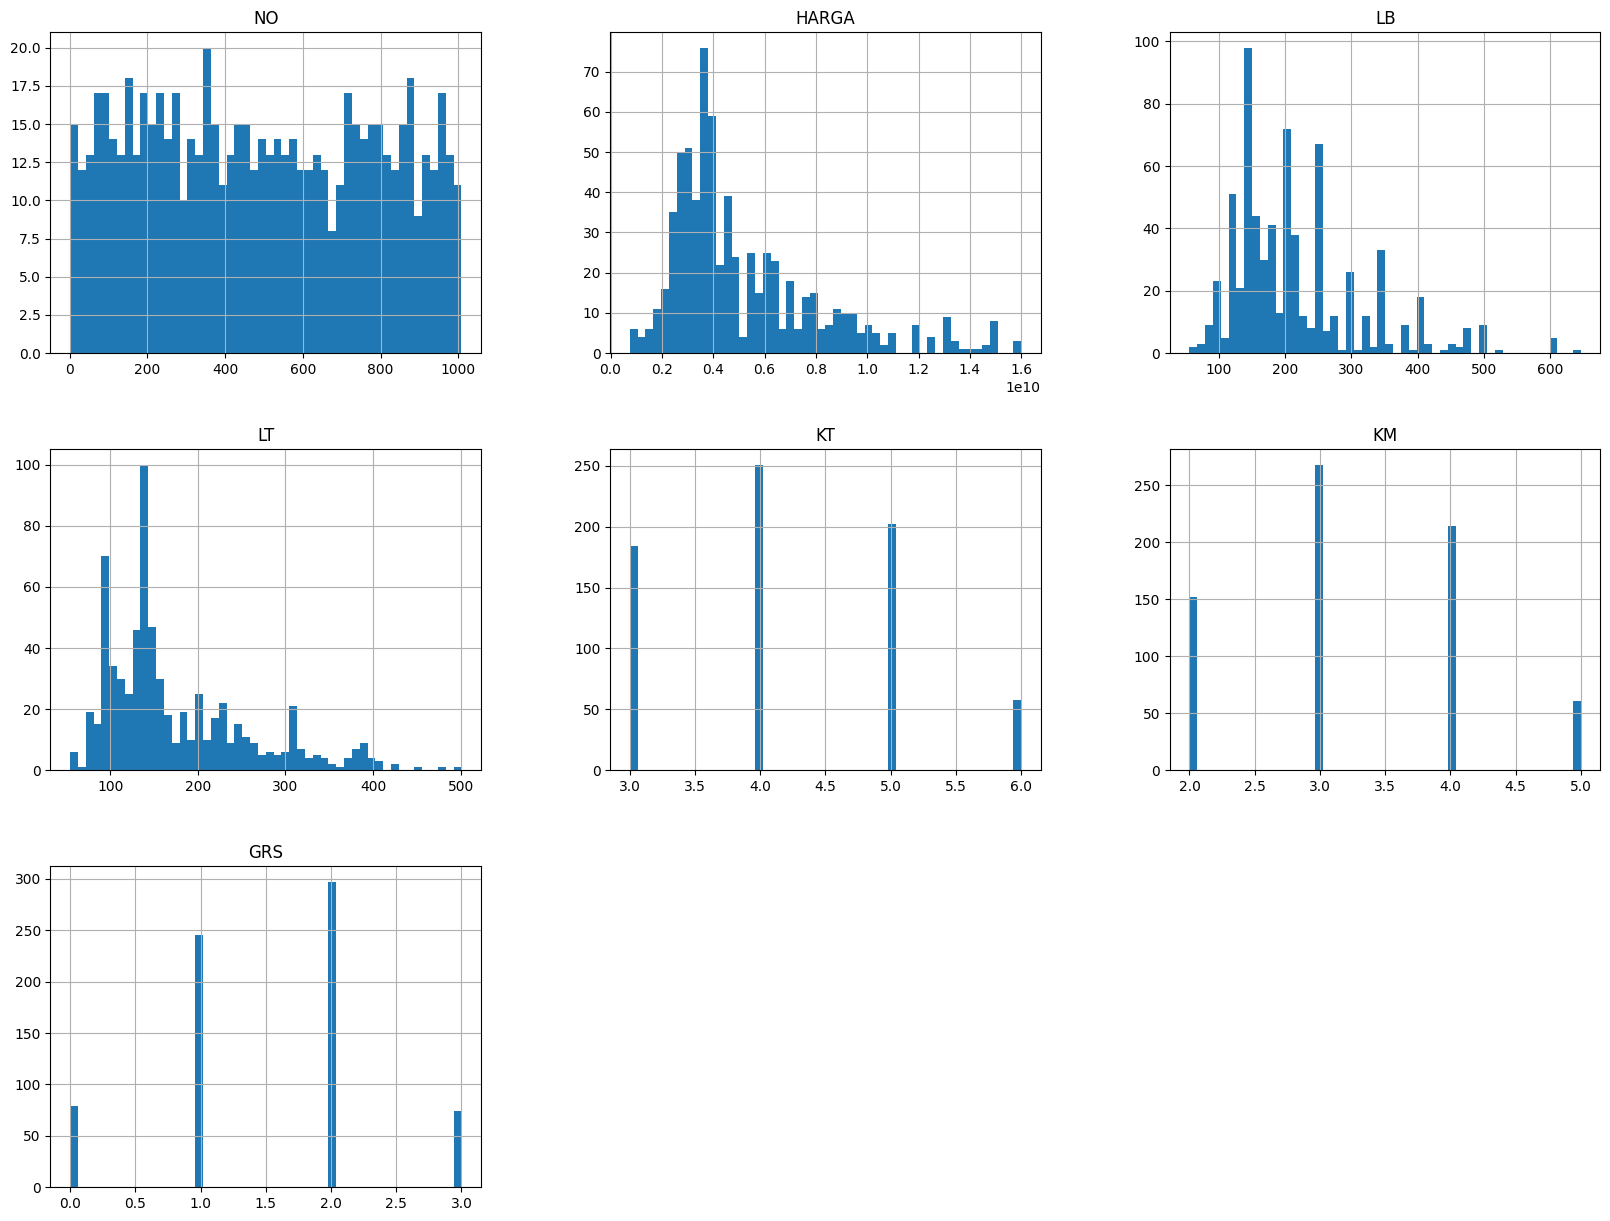

In [15]:
rumah.hist(bins=50, figsize=(20,15))
plt.show()

## Multivariate Analysis

### Numerical Features

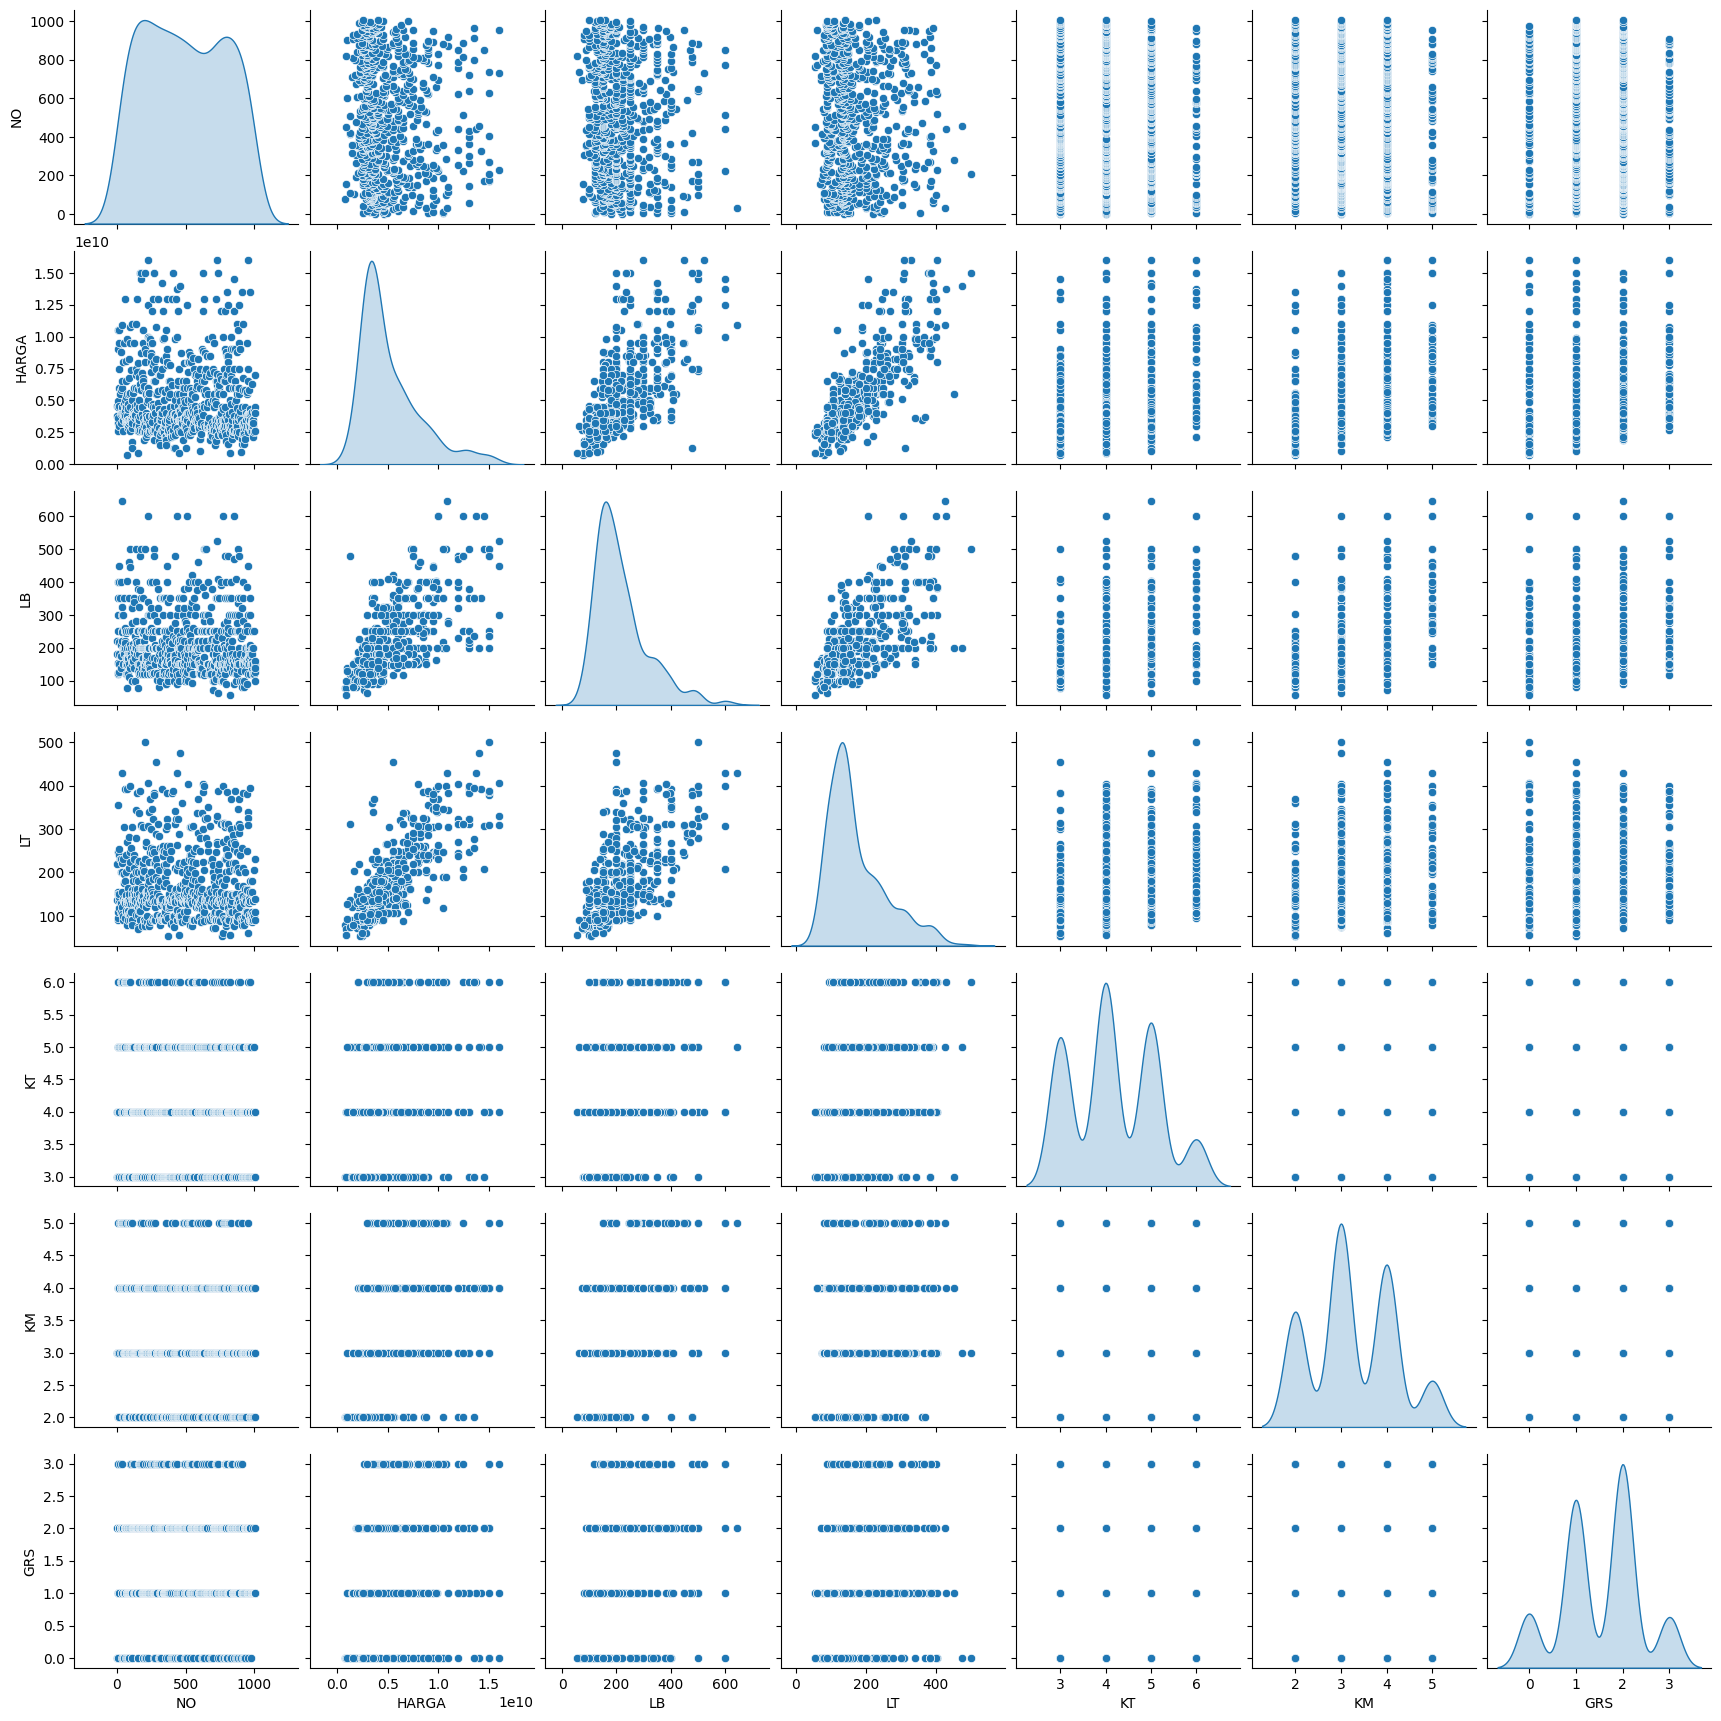

In [16]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(rumah, diag_kind = 'kde')

**Korelasi antar Fitur**

Heatmap korelasi menunjukkan hubungan antar variabel numerik. Korelasi tinggi antara LB (luas bangunan) dan HARGA menunjukkan bahwa luas bangunan adalah prediktor kuat harga rumah.

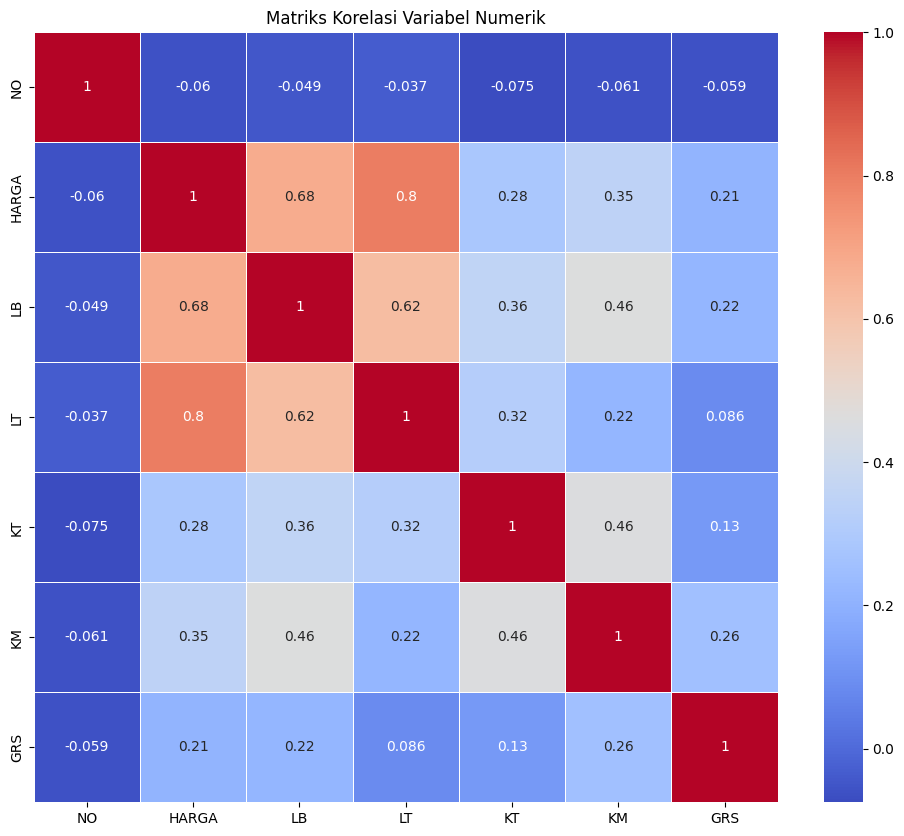

In [17]:
# Korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
correlation = rumah[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

## Data Preparation

In [18]:
# Menghapus kolom 'NO'
if 'NO' in rumah.columns:
    rumah = rumah.drop('NO', axis=1)
    print("\nKolom 'NO' telah dihapus karena tidak dibutuhkan")


Kolom 'NO' telah dihapus karena tidak dibutuhkan


In [19]:
# Menghapus kolom 'NAMA RUMAH'
if 'NAMA RUMAH' in rumah.columns:
    rumah = rumah.drop('NAMA RUMAH', axis=1)
    print("\nKolom 'NAMA RUMAH' telah dihapus karena tidak dibutuhkan")


Kolom 'NAMA RUMAH' telah dihapus karena tidak dibutuhkan


### Train-Test-Split

**Pembagian Data Latih dan Uji**

Data dibagi menjadi data latih dan uji untuk memastikan model dievaluasi pada data yang belum pernah dilihat sebelumnya. Hal ini penting untuk menghindari overfitting.

In [20]:
X = rumah.drop(["HARGA"],axis =1)
y = rumah["HARGA"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

In [21]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 695
Total # of sample in train dataset: 556
Total # of sample in test dataset: 139


### Standarisasi

**Proses Standarisasi**

Standarisasi digunakan agar fitur numerik berada pada skala yang seragam. Ini penting terutama untuk algoritma seperti KNN yang sensitif terhadap skala data.

In [22]:
numerical_features = ['LT', 'LB', 'KT', 'KM', 'GRS']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,LT,LB,KT,KM,GRS
764,0.065568,-0.669709,-1.258689,-1.377445,-0.648048
611,0.125568,0.330797,-0.186972,-0.272309,0.537197
198,0.317567,0.030645,0.884745,0.832828,-0.648048
262,-0.378430,-0.969860,-1.258689,-1.377445,-0.648048
336,1.037564,0.831049,-0.186972,0.832828,1.722443


In [23]:
X_train[numerical_features].describe().round(4)

,LT,LB,KT,KM,GRS
count,556.0000,556.0000,556.0000,556.0000,556.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,0.0000
std,1.0009,1.0009,1.0009,1.0009,1.0009
min,-1.4344,-1.6102,-1.2587,-1.3774,-1.8333
25%,-0.7384,-0.6697,-1.2587,-0.2723,-0.6480
50%,-0.3904,-0.1695,-0.1870,-0.2723,0.5372
75%,0.5576,0.3308,0.8847,0.8328,0.5372
max,3.9296,4.2928,1.9565,1.9380,1.7224


## Model Development

In [24]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

### KNN

**Model K-Nearest Neighbors (KNN)**

KNN memprediksi berdasarkan tetangga terdekat. Model ini sederhana namun sensitif terhadap outlier dan skala fitur.

In [25]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest

**Model Random Forest**

Model ini menggunakan banyak pohon keputusan dan melakukan voting untuk menghasilkan prediksi. Cocok untuk menangani data non-linear dan memberikan performa yang stabil.

In [26]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=111, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

### Bossting Algorithm

**Model AdaBoost**

AdaBoost memperbaiki kelemahan model-model dasar secara iteratif. Cenderung lebih sensitif terhadap noise, namun cukup akurat pada dataset yang bersih.

In [27]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=111)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Evaluasi Model

In [28]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

**Evaluasi Model dengan MSE**
Mean Squared Error (MSE) digunakan untuk mengevaluasi performa model regresi. Nilai MSE yang lebih rendah menunjukkan prediksi yang lebih akurat.

In [29]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,1729495362316779.5,2876964775824014.0
RF,519186521428438.5625,2425023465318333.5
Boosting,2344413129177157.5,2425221097144163.0


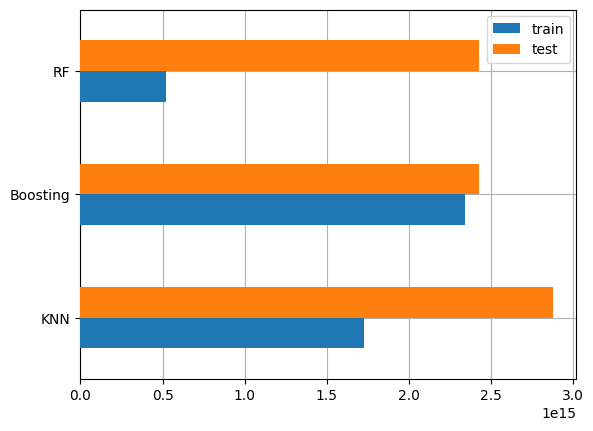

In [30]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [31]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
199,6100000000,6.116667e+09,6.433735e+09,7.279615e+09


In [32]:
# Fungsi untuk menghitung akurasi berdasarkan persentase error (MAPE)
def prediksi_akurasi(y_true, y_pred):
    error = abs(y_pred - y_true)
    mape = error / y_true * 100
    akurasi = 100 - mape
    return akurasi.round(2)

# Ambil nilai y_true sebenarnya
y_true_value = y_test.iloc[0]

# Siapkan dictionary baru untuk menyimpan hasil prediksi & akurasi
hasil_prediksi = {
    'y_true': y_true_value
}

# Hitung prediksi dan akurasi untuk tiap model
for name, model in model_dict.items():
    y_pred = model.predict(prediksi)[0]  # ambil nilai prediksi sebagai angka
    akurasi = prediksi_akurasi(y_true_value, y_pred)

    hasil_prediksi[f'prediksi_{name}'] = y_pred
    hasil_prediksi[f'akurasi_{name}'] = f"{akurasi}%"  # simpan sebagai string untuk dibaca manusia

# Tampilkan hasilnya dalam DataFrame
pd.DataFrame([hasil_prediksi])


,y_true,prediksi_KNN,akurasi_KNN,prediksi_RF,akurasi_RF,prediksi_Boosting,akurasi_Boosting
0,6100000000,6.116667e+09,99.73%,6.433735e+09,94.53%,7.279615e+09,80.66%
